CIFAR-10 dataset is a widely used benchmark dataset in machine learning and computer vision research. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes are:
1.   Airplane
2.   Automobile
1.   Bird
2.   Cat
1.   Deer
2.   Dog
1.   Frog
2.   Horse
1.   Ship
2.   Truck

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
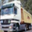

In [4]:
X_train[1]

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y_train,num_classes=10)
y.shape

(50000, 10)

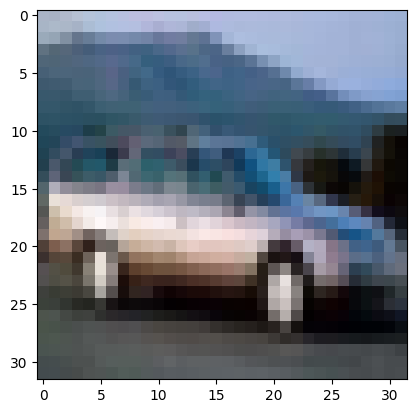

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4])

In [8]:
y_train[4] # automobile image

array([1], dtype=uint8)

In [9]:
# pixel values between 0-1
X_train=X_train/255.0
X_test=X_test/255.0
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [10]:
model=Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) #default learning rate 0.001.

In [13]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 7s 4ms/step - loss: 1.9122 - accuracy: 0.3155 - val_loss: 1.8182 - val_accuracy: 0.3587
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7654 - accuracy: 0.3692 - val_loss: 1.7784 - val_accuracy: 0.3480
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7059 - accuracy: 0.3930 - val_loss: 1.7413 - val_accuracy: 0.3805
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6766 - accuracy: 0.4020 - val_loss: 1.7030 - val_accuracy: 0.3937
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6535 - accuracy: 0.4114 - val_loss: 1.7005 - val_accuracy: 0.4074
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6351 - accuracy: 0.4171 - val_loss: 1.6573 - val_accuracy: 0.4051
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6241 - accuracy: 0.4196 - val_loss: 1.6455 - val_accuracy:

In [14]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[0.02310715, 0.06484254, 0.08087035, ..., 0.00163141, 0.27044588,
        0.00150931],
       [0.1708796 , 0.5309236 , 0.00231994, ..., 0.00134692, 0.05688092,
        0.23564018],
       [0.37903237, 0.2667991 , 0.0231934 , ..., 0.00604708, 0.1699429 ,
        0.11937252],
       ...,
       [0.02021097, 0.0010415 , 0.05976165, ..., 0.04215197, 0.04088203,
        0.00118542],
       [0.08744686, 0.0168054 , 0.18686822, ..., 0.09632765, 0.00240631,
        0.00324237],
       [0.07851645, 0.01590485, 0.12032264, ..., 0.4847907 , 0.02063038,
        0.01084674]], dtype=float32)

In [15]:
class_prob=model.predict(X_test)
class_prob.argmax(axis=1)
yhat= class_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yhat)

0.4163

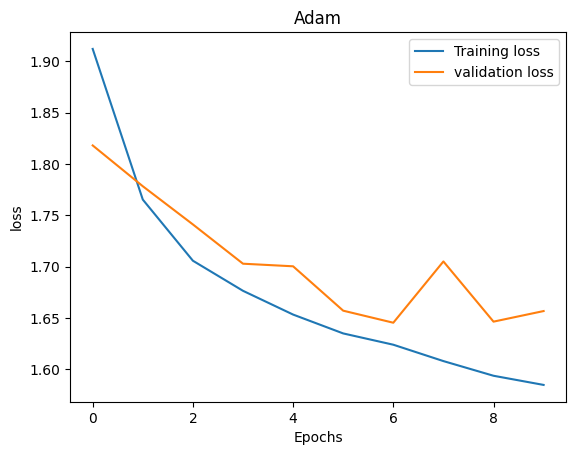

In [17]:
plt.title('Adam')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

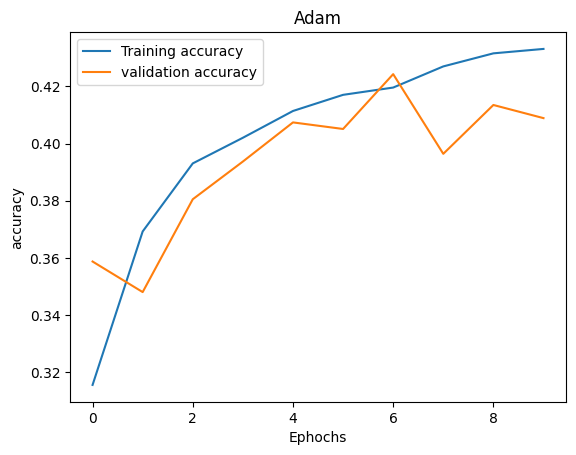

In [18]:
plt.title('Adam')
plt.xlabel('Ephochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()

In [19]:
from tensorflow.keras.layers import Dropout

# Using Dropout layer

In [24]:
model1=Sequential()
model1.add(Flatten(input_shape=(32, 32, 3)))
model1.add(Dropout(0.2))
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10,activation='softmax'))

In [25]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [26]:
history=model1.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1002 - accuracy: 0.2077 - val_loss: 1.9626 - val_accuracy: 0.2752
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0122 - accuracy: 0.2425 - val_loss: 1.9392 - val_accuracy: 0.2809
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9867 - accuracy: 0.2504 - val_loss: 1.9252 - val_accuracy: 0.2957
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9645 - accuracy: 0.2682 - val_loss: 1.8577 - val_accuracy: 0.3226
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9485 - accuracy: 0.2729 - val_loss: 1.9472 - val_accuracy: 0.2830
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9471 - accuracy: 0.2765 - val_loss: 1.8532 - val_accuracy: 0.3232
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9371 - accuracy: 0.2779 - val_loss: 1.8514 - val_accuracy:

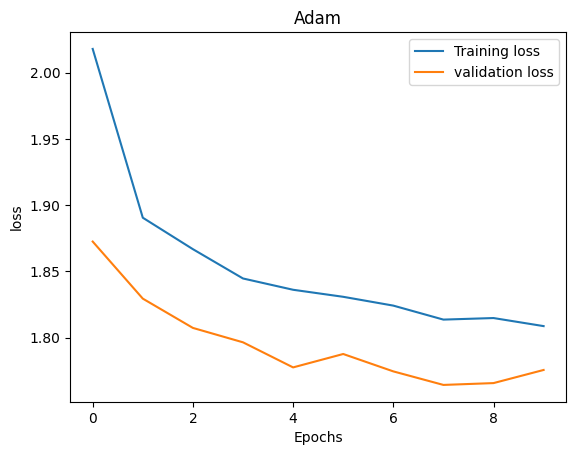

In [23]:
plt.title('Adam')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

In [27]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Used Convolution layers

In [28]:
model2=Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))

model2.add(Flatten(input_shape=(32, 32, 3)))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [29]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [31]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [32]:
history=model2.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 11s 6ms/step - loss: 1.5638 - accuracy: 0.4317 - val_loss: 1.3008 - val_accuracy: 0.5293
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1971 - accuracy: 0.5763 - val_loss: 1.1848 - val_accuracy: 0.5868
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0402 - accuracy: 0.6334 - val_loss: 1.1172 - val_accuracy: 0.6190
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9313 - accuracy: 0.6735 - val_loss: 0.9607 - val_accuracy: 0.6629
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8557 - accuracy: 0.6989 - val_loss: 0.9400 - val_accuracy: 0.6703
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7915 - accuracy: 0.7219 - val_loss: 0.9511 - val_accuracy: 0.6772
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7282 - accuracy: 0.7440 - val_loss: 0.8836 - val_accuracy

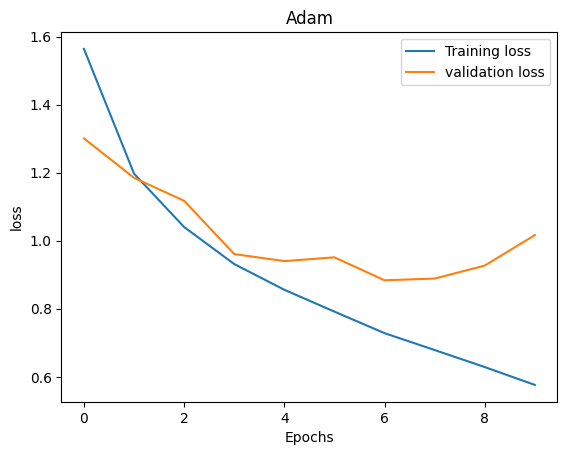

In [33]:
plt.title('Adam')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

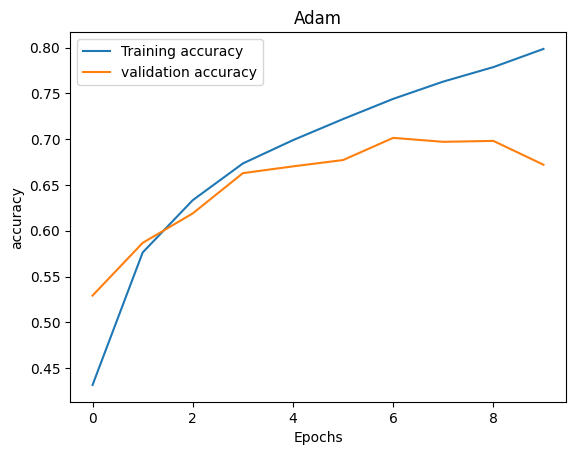

In [34]:
plt.title('Adam')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()

# With Convolution ~ Using Dropout layer 0.1

In [35]:
# Adding Dropout layers
model2=Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))

model2.add(Flatten(input_shape=(32, 32, 3)))
model2.add(Dropout(0.1))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(10,activation='softmax'))

In [36]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [37]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
history=model2.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 9s 6ms/step - loss: 1.5626 - accuracy: 0.4285 - val_loss: 1.3162 - val_accuracy: 0.5339
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2092 - accuracy: 0.5663 - val_loss: 1.1234 - val_accuracy: 0.6060
Epoch 3/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0558 - accuracy: 0.6258 - val_loss: 1.0013 - val_accuracy: 0.6478
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9511 - accuracy: 0.6622 - val_loss: 0.9434 - val_accuracy: 0.6664
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8797 - accuracy: 0.6891 - val_loss: 0.9491 - val_accuracy: 0.6643
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8154 - accuracy: 0.7147 - val_loss: 0.9099 - val_accuracy: 0.6783
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7546 - accuracy: 0.7355 - val_loss: 0.9098 - val_accuracy

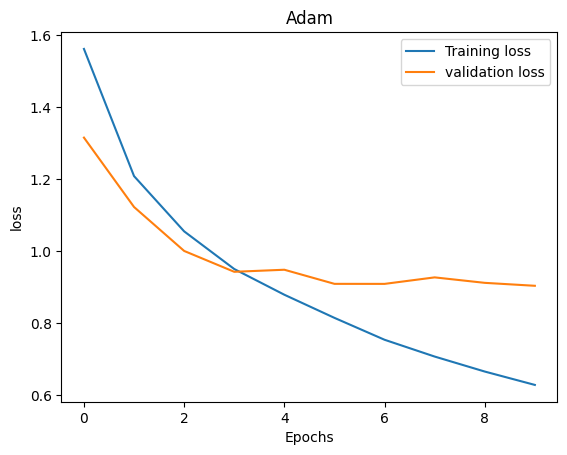

In [39]:
plt.title('Adam')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

# With Convolution ~ Using Dropout layer 0.2

In [44]:
# Adding Dropout layers
model3=Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))

model3.add(Flatten(input_shape=(32, 32, 3)))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10,activation='softmax'))

In [45]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [46]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [47]:
history=model3.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 8s 5ms/step - loss: 1.5756 - accuracy: 0.4236 - val_loss: 1.3881 - val_accuracy: 0.5016
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2344 - accuracy: 0.5579 - val_loss: 1.0831 - val_accuracy: 0.6180
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0874 - accuracy: 0.6168 - val_loss: 0.9873 - val_accuracy: 0.6453
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9941 - accuracy: 0.6510 - val_loss: 0.9789 - val_accuracy: 0.6518
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9220 - accuracy: 0.6767 - val_loss: 0.9312 - val_accuracy: 0.6736
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8602 - accuracy: 0.6969 - val_loss: 0.8850 - val_accuracy: 0.6884
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8141 - accuracy: 0.7137 - val_loss: 0.8742 - val_accuracy:

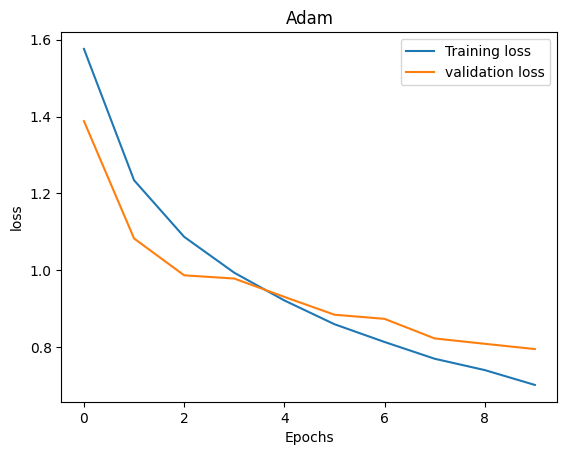

In [48]:
plt.title('Adam')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

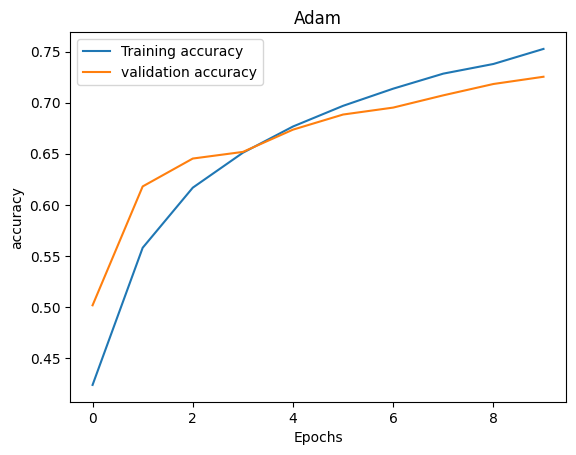

In [49]:
plt.title('Adam')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()

# Using Earlystopping

In [50]:
from keras.callbacks import EarlyStopping

In [51]:
model4=Sequential()

model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))

model4.add(Flatten(input_shape=(32, 32, 3)))
model4.add(Dense(128,activation='relu'))
model4.add(Dense(10,activation='softmax'))

model4.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [52]:
history=model4.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 9s 6ms/step - loss: 1.5276 - accuracy: 0.4425 - val_loss: 1.2395 - val_accuracy: 0.5655
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1585 - accuracy: 0.5878 - val_loss: 1.0891 - val_accuracy: 0.6161
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0026 - accuracy: 0.6459 - val_loss: 0.9871 - val_accuracy: 0.6523
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8975 - accuracy: 0.6852 - val_loss: 0.9583 - val_accuracy: 0.6694
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8115 - accuracy: 0.7139 - val_loss: 0.9399 - val_accuracy: 0.6781
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7420 - accuracy: 0.7394 - val_loss: 0.8962 - val_accuracy: 0.6892
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6717 - accuracy: 0.7635 - val_loss: 0.8672 - val_accuracy:

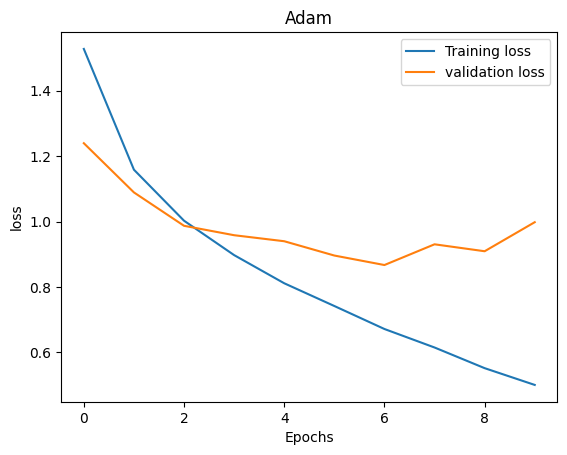

In [53]:
plt.title('Adam')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

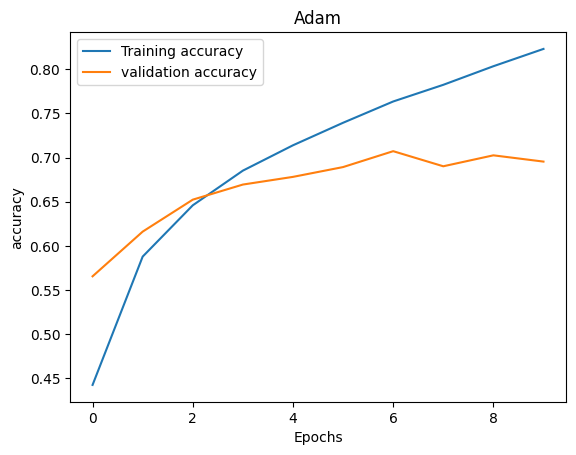

In [54]:
plt.title('Adam')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()